# 使用pandas讀寫資料
## 純文字資料格式
### 讀取純文字的部份方法

- read_csv()  
- read_table() 
- read_excel()  
- read_html()
- read_json()  
- read_sas()  
- read_sql() 

#### 常用的引數功能
    1 indexing
    2 資料類型的推測和資料類型的轉換
    3 日期時間的解析
    4 對大型檔案提供多次讀取
    5 清理資料,省略讀取不要的列,header,footer,註解

In [3]:
#使用指令檢視內容
#!cat -> mac
#!type -> windows

!cat ex1.csv

'''
a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo
'''

#如果是使用「,」分隔,可以使用read_csv
import pandas as pd
dataFrame = pd.read_csv('ex1.csv')
dataFrame

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [4]:
#read_table(),加上指定的間格符號
pd.read_table('ex1.csv',sep=',')

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [6]:
#沒有欄位的csv
!cat ex2.csv

'''
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo
'''

pd.read_csv('ex2.csv',header=None)

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

0   1   2   3      4
0  1   2   3   4  hello
1  5   6   7   8  world
2  9  10  11  12    foo

In [7]:
#指定欄位名稱
pd.read_csv('ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [8]:
#指定那一個欄,成為索引
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('ex2.csv', names = names, index_col='message')

a   b   c   d
message               
hello    1   2   3   4
world    5   6   7   8
foo      9  10  11  12

In [11]:
#指定多重索引
!cat csv_mindex.csv

pd.read_csv('csv_mindex.csv', index_col=['key1', 'key2'])

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [14]:
#沒有固定的分隔
#使用read_table()
#sep使用正規則字串
!cat ex3.txt

pd.read_table('ex3.txt', sep='\s+')

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491

In [16]:
#排除列
#使用引數名稱skiprows
!cat ex4.csv
pd.read_csv('ex4.csv', skiprows=[0, 2, 3])

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [21]:
#處理遺失值
!cat ex5.csv
result = pd.read_csv('ex5.csv')

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

In [22]:
pd.isnull(result)

something      a      b      c      d  message
0      False  False  False  False  False     True
1      False  False  False   True  False    False
2      False  False  False  False  False    False

In [24]:
result = pd.read_csv('ex5.csv', na_values=['NULL'])
result

something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo

In [25]:
sentinels = {'message':['foo', 'NA'], 'something':['two']}
pd.read_csv('ex5.csv', na_values=sentinels)

something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       NaN  5   6   NaN   8   world
2     three  9  10  11.0  12     NaN

In [40]:
#實際案例
#選擇想要的欄位

result = pd.read_csv('個股日成交資訊.csv',usecols=['證券代號','成交金額','收盤價','成交筆數'])

In [46]:
### 一次讀取部份資料(大量檔案)
#改變pandas的設定檔
pd.options.display.max_rows = 10
result = pd.read_csv('ex6.csv')
result

one       two     three      four key
0     0.467976 -0.038649 -0.295344 -1.824726   L
1    -0.358893  1.404453  0.704965 -0.200638   B
2    -0.501840  0.659254 -0.421691 -0.057688   G
3     0.204886  1.074134  1.388361 -0.982404   R
4     0.354628 -0.133116  0.283763 -0.837063   Q
...        ...       ...       ...       ...  ..
9995  2.311896 -0.417070 -1.409599 -0.515821   L
9996 -0.479893 -0.650419  0.745152 -0.646038   E
9997  0.523331  0.787112  0.486066  1.093156   K
9998 -0.362559  0.598894 -1.843201  0.887292   G
9999 -0.096376 -1.012999 -0.657431 -0.573315   0

[10000 rows x 5 columns]

In [48]:
#使用引數名稱nrows,限定讀取的筆數
pd.read_csv('ex6.csv', nrows=5)

one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
4  0.354628 -0.133116  0.283763 -0.837063   Q

In [57]:
#使用chunksize取得dataFrame
#使用Series.add()加入另一個Series
chunker = pd.read_csv('ex6.csv', chunksize=1000)
chunker
#<pandas.io.parsers.TextFileReader at 0x7f84f8e6d150>

tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

### 將資料寫入文字檔

In [60]:
#使用to_csv()
data = pd.read_csv('ex5.csv')
data
'''
  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo
'''

data.to_csv('out.csv')
!cat out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [61]:
#將資料顯示到控制台
import sys
data = pd.read_csv('ex5.csv')
data
'''
  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo
'''

data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [62]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [63]:
#不要header和index
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [67]:
#Series也有to_csv()
import numpy as np
import pandas as pd
dates = pd.date_range('2000/1/1',periods=7)
dates
'''
DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')
'''

ts = pd.Series(np.arange(7), index=dates)

ts.to_csv('tseries.csv',header=False)
!cat tseries.csv

2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


In [68]:
#使用csv
!cat ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [69]:
import csv
f = open('ex7.csv')
reader = csv.reader(f)
for line in reader:
    print(line)
f.close()

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [70]:
#使用csv
with open('ex7.csv') as f:
    lines = list(csv.reader(f))
header, values = lines[0], lines[1:]
data_dict = {}
data_dict = {h:v for h,v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

#### homework1-下載和儲存政府資料開放平台-空氣品質指數(AQI)
[空氣品質指數](https://github.com/roberthsu2003/PythonForDataAnalysis/blob/master/pandas%E7%9A%84%E6%AA%94%E6%A1%88%E5%AD%98%E5%8F%96/download%E6%94%BF%E5%BA%9C%E8%B3%87%E6%96%99%E9%96%8B%E6%94%BE%E5%B9%B3%E5%8F%B0_%E7%A9%BA%E6%B0%A3%E5%93%81%E8%B3%AA%E6%8C%87%E6%A8%99_csv%E4%B8%8B%E8%BC%89%E5%84%B2%E5%AD%98.ipynb)

### JSON格式

In [75]:
#使用json.loads()將json字串格式,轉換為python資料結構
obj = """
    {"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
                  {"name": "Katie", "age": 38,
                   "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

import json
result = json.loads(obj)
result
'''
{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}
'''

siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

name  age
0  Scott   30
1  Katie   38

In [76]:
#使用json.dumps()將python資料結構轉換為json字串格式
asjson = json.dumps(result)
asjson
'''
'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'
'''

'\n\'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}\'\n'

In [77]:
!cat example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [78]:
data = pd.read_json('example.json')
data

a  b  c
0  1  2  3
1  4  5  6
2  7  8  9

In [79]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [80]:
print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


#### homework2下載氣象觀測資料
[下載氣象觀測資料](https://github.com/roberthsu2003/PythonForDataAnalysis/blob/master/pandas%E7%9A%84%E6%AA%94%E6%A1%88%E5%AD%98%E5%8F%96/download%E6%94%BF%E5%BA%9C%E8%B3%87%E6%96%99%E5%B9%B3%E5%8F%B0%E8%A7%A3%E6%B1%BA%E6%96%B9%E6%A1%88_json.ipynb)

### Excel檔案

In [84]:
#使用pd.ExcelFile()

#建立excel檔案格式
xlsx = pd.ExcelFile('ex1.xlsx')
pd.read_excel(xlsx, 'Sheet1')

Unnamed: 0  a   b   c   d message
0           0  1   2   3   4   hello
1           1  5   6   7   8   world
2           2  9  10  11  12     foo

In [85]:
#更簡單的方式讀取excel檔案格式

frame = pd.read_excel('ex1.xlsx', 'Sheet1')
frame

Unnamed: 0  a   b   c   d message
0           0  1   2   3   4   hello
1           1  5   6   7   8   world
2           2  9  10  11  12     foo

In [86]:
#將dataFrame儲存為excel格式
writer = pd.ExcelWriter('ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

#更簡單方式
frame.to_excel('ex3.xlsx')

In [118]:
#總統.xls
frame = pd.read_excel('總統.xls','中　央')
frame

第14任總統、副總統選舉候選人得票數一覽表     Unnamed: 1     Unnamed: 2     Unnamed: 3  \
0                   行政區別      各組候選人得票情形            NaN            NaN   
1                    NaN  (1)\n朱立倫\n王如玄  (2)\n蔡英文\n陳建仁  (3)\n宋楚瑜\n徐欣瑩   
2                    NaN            NaN            NaN            NaN   
3                    NaN            NaN            NaN            NaN   
4                    總　計        3813365        6894744        1576861   
..                   ...            ...            ...            ...   
22                  　基隆市          68357          93402          31955   
23                  　新竹市          71771         113386          36198   
24                  　嘉義市          38822          83143          16926   
25                  　金門縣          24327           6626           5852   
26                  　連江縣           3065            739            664   

            Unnamed: 4 Unnamed: 5   Unnamed: 6      Unnamed: 7    Unnamed: 8  \
0   有效票數A\nA=1+2+...+N      無效票數B  投票數C\nC=A+B  已領未投票數D\nD=E-C  發出票數E\nE=C+D   
1                  NaN        NaN          NaN             NaN           NaN   
2                  NaN        NaN          NaN             NaN           NaN   
3                  NaN        NaN          NaN             NaN           NaN   
4             12284970     163332     12448302             291      12448593   
..                 ...        ...          ...             ...           ...   
22              193714       2432       196146               6        196152   
23              221355       3138       224493               0        224493   
24              138891       1492       140383               2        140385   
25               36805        599        37404               0         37404   
26                4468         85         4553               0          4553   

   Unnamed: 9   Unnamed: 10  Unnamed: 11  
0       用餘票數F  選舉人數G\nG=E+F  投票率H\nH=C÷G  
1         NaN           NaN          NaN  
2         NaN           NaN          NaN  
3         NaN           NaN          NaN  
4     6334398      18782991        66.27  
..        ...           ...          ...  
22     110396        306548        63.99  
23     104087        328580        68.32  
24      70373        210758        66.61  
25      73982        111386        33.58  
26       5687         10240        44.46  

[27 rows x 12 columns]

###  Web API

In [92]:
#使用request package
#github api
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp
data = resp.json()
issues = pd.DataFrame(data, columns=['number', 'title', 'labels','state'])
issues

number                                              title  \
0    32923               Proposal: Rename bool() to to_bool()   
1    32922                               DEPR: Index.is_mixed   
2    32921                       TYP: Annotate groupby/ops.py   
3    32920       REF: misplaced to_datetime, date_range tests   
4    32919             CLN: Remove unused is_datetimelike arg   
..     ...                                                ...   
25   32894   [BUG] Sum of grouped bool has inconsistent dtype   
26   32893                        Added `const` where avaible   
27   32890  BUG: Fix replacing in `string` series with NA ...   
28   32885  Provide [major|religious|national] holiday off...   
29   32882  Cannot install pandas correctly in a particula...   

                                               labels state  
0                                                  []  open  
1                                                  []  open  
2   [{'id': 1280988427, 'node_id': 'MDU6TGFiZWwxMj...  open  
3   [{'id': 211029535, 'node_id': 'MDU6TGFiZWwyMTE...  open  
4   [{'id': 211029535, 'node_id': 'MDU6TGFiZWwyMTE...  open  
..                                                ...   ...  
25  [{'id': 31404521, 'node_id': 'MDU6TGFiZWwzMTQw...  open  
26  [{'id': 8935311, 'node_id': 'MDU6TGFiZWw4OTM1M...  open  
27  [{'id': 849023693, 'node_id': 'MDU6TGFiZWw4NDk...  open  
28                                                 []  open  
29  [{'id': 129350, 'node_id': 'MDU6TGFiZWwxMjkzNT...  open  

[30 rows x 4 columns]

In [111]:
#openWeatherMap api
#Taipei:1668341
#Taichung:1668399
#Pingtung:16704818
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import requests
url = 'http://api.openweathermap.org/data/2.5/group?id=1668341,1668399,1670481&units=metric&appid=29c4f184354b9889e87f7b494ac86aed'
resp = requests.get(url)
resp
weatherData = resp.json()
weatherDict = {}
lon = []
lat = []
temp = []
humidity = []
name = []
for item in weatherData['list']:
    lon.append(item['coord']['lon'])
    lat.append(item['coord']['lat'])
    temp.append(item['main']['temp'])
    humidity.append(item['main']['humidity'])
    name.append(item['name'])

weatherDict['城市'] = name
weatherDict['緯度'] = lat
weatherDict['經度'] = lon
weatherDict['攝氏'] = temp
weatherDict['溼度'] = humidity
weatherDict
weatherDataFrame = pd.DataFrame(weatherDict,columns=['攝氏', '溼度','緯度', '經度'],index=weatherDict['城市'])
weatherDataFrame

攝氏  溼度     緯度      經度
Taipei    20.60  77  25.05  121.53
Taichung  25.73  69  24.15  120.68
Pingtung  27.78  45  22.67  120.49

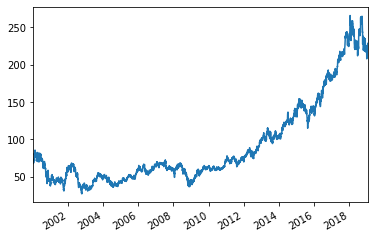

In [117]:
#台績電指數
import requests
import pandas as pd
import json
import numpy as np

url = "https://query1.finance.yahoo.com/v8/finance/chart/2330.TW?period1=0&period2=1549258857&interval=1d&events=history&=hP2rOschxO0"

res = requests.get(url)
data = json.loads(res.text)
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
df.head()
'''
                          high       open        low        volume      close
2000-01-04 01:00:00  69.649002  69.649002  68.475197  2.006623e+11  69.649002
2000-01-05 01:00:00  71.214104  69.649002  68.866302  4.024668e+11  71.214104
2000-01-06 01:00:00  71.214104  70.822899  69.649002  1.975457e+11  69.649002
2000-01-07 01:00:00  68.475197  67.301300  66.518600  2.352703e+11  67.692497
2000-01-10 01:00:00  70.431396  69.649002  68.475197  2.761717e+11  70.040199
'''

df['close'].plot()

### SQLite

In [122]:
#建立sqlite
#加入資料
import sqlite3

query= """
CREATE TABLE test(a VARCHAR(20), b VARCHAR(20), c REAL, d INTEGER);
"""
con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit()

data = [
    ('Atlanta', 'Georgia', 1.25, 6),
    ('Tallahassee', 'Florida', 2.6, 3),
    ('Sacramento', 'California', 1.7, 5)
]

stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit() #再次執行會出錯,要將mydata.sqlite刪除

In [126]:
#讀取資料
con = sqlite3.connect('mydata.sqlite')
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows
'''
[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]
'''

cursor.description
'''
(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))
'''

pd.DataFrame(rows,columns=[x[0] for x in cursor.description])

a           b     c  d
0      Atlanta     Georgia  1.25  6
1  Tallahassee     Florida  2.60  3
2   Sacramento  California  1.70  5